## TTim Exercise 1

In [9]:
import matplotlib.pyplot as plt
import numpy as np

import ttim

Consider a three-aquifer system. Aquifer properties are given in Table 1. All aquifers have elastic storage. A well is located at $(x,y)=(0,0)$ and is screened in layer 1. The well starts pumping at time $t=0$ with a discharge $Q=1000$ m$^3$/d. The radius of the well is 0.2 m.

#### Table 1 - Aquifer properties for exercise 1
|Layer          | $k$ (m/d) | $c$ (d) | $S_s$ (m$^{-1}$) | $z_t$ (m) | $z_b$ (m)|
|---------------| ---------:| -------:| -----:| ---------:| --------:|
|Aquifer 0      |      1    |    -    |0.0001 |   25      |        20|
|Leaky layer 1  |      -    |  1000   |0      |   20      |        18|
|Aquifer 1      |     20    |    -    |0.0001 |   18      |        10|
|Leaky layer 2  |      -    |  2000   |0      |   10      |         8|
|Aquifer 2      |      2    |    -    |0.0001 |    8      |         0|


#### Exercise 1a

Compute the head as a function of time at $(x,y)=(50,0)$. Make a plot of the head vs. time from $t=0.1$ till $t=1000$ days using a linear scaling on both axis. Do the same using a logarithmic time axis.

self.neq  1
solution complete


Text(0.5, 0, 'time [days]')

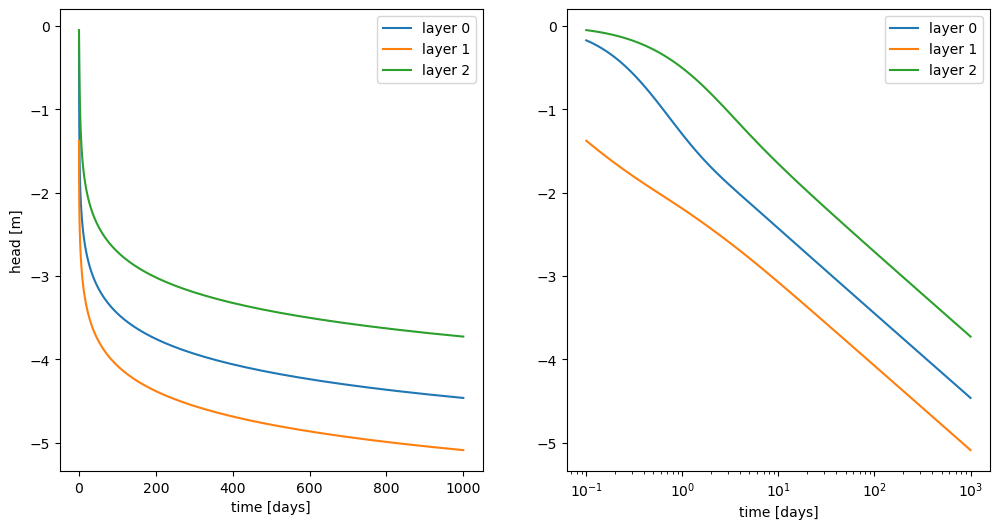

In [10]:
ml = ttim.ModelMaq(
    kaq=[1, 20, 2],
    z=[25, 20, 18, 10, 8, 0],
    c=[1000, 2000],
    Saq=[1e-4, 1e-4, 1e-4],
    Sll=[0, 0],
    phreatictop=False,
    tmin=0.1,
    tmax=1000,
)
w = ttim.Well(ml, xw=0, yw=0, rw=0.2, tsandQ=[(0, 1000)], layers=1)
ml.solve()

t = np.logspace(-1, 3, 100)
h = ml.head(50, 0, t)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(t, h[0], label="layer 0")
plt.plot(t, h[1], label="layer 1")
plt.plot(t, h[2], label="layer 2")
plt.legend(loc="best")
plt.ylabel("head [m]")
plt.xlabel("time [days]")
plt.subplot(122)
plt.semilogx(t, h[0], label="layer 0")
plt.semilogx(t, h[1], label="layer 1")
plt.semilogx(t, h[2], label="layer 2")
plt.legend(loc="best")
plt.xlabel("time [days]")

#### Exercise 1b
Create a plot of the head vs. distance from the well after 10 days of pumping. Plot the head in all three layers up to a distance of 1000 m from the well. Make the same plot after 1000 days of pumping. Is there much difference between 100 and 1000 days of pumping?

Text(0, 0.5, 'head (m)')

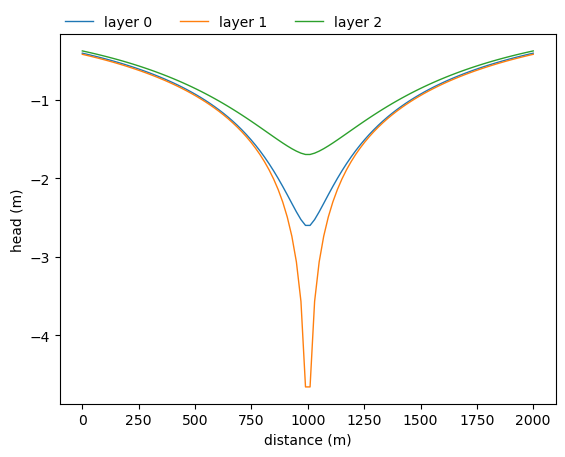

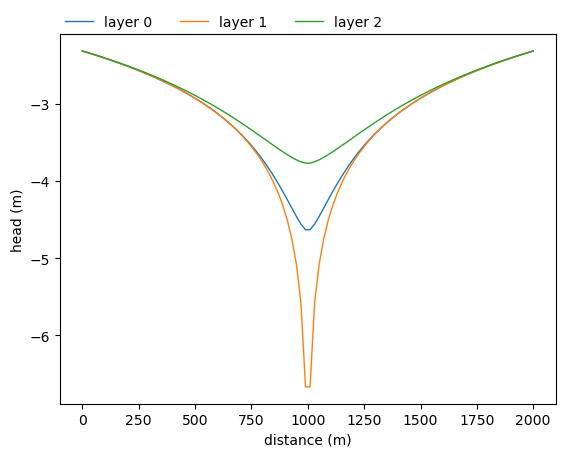

In [11]:
ml.plots.head_along_line(
    x1=-1000, x2=1000, y1=0, y2=0, npoints=100, t=10, layers=[0, 1, 2]
)
plt.xlabel("distance (m)")
plt.ylabel("head (m)")

ml.plots.head_along_line(
    x1=-1000, x2=1000, y1=0, y2=0, npoints=100, t=1000, layers=[0, 1, 2]
)
plt.xlabel("distance (m)")
plt.ylabel("head (m)")

#### Exercise 1c
The well is turned off after 100 days. Compute the head as a function of time at $(x,y)=(50,0)$. Make a plot of the head vs. time from $t=0.1$ till $t=1000$ days using a logarithmic time axis.

self.neq  1
solution complete


Text(0.5, 0, 'time [days]')

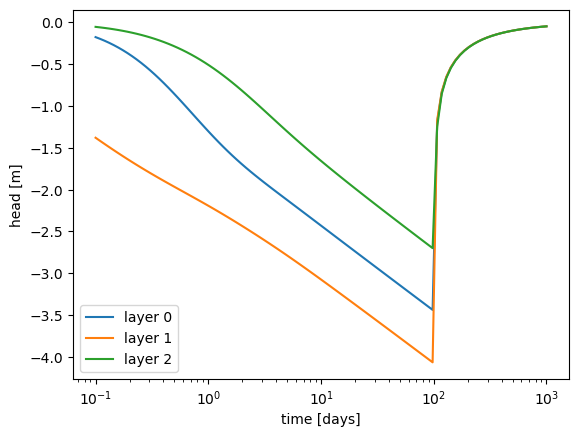

In [12]:
ml = ttim.ModelMaq(
    kaq=[1, 20, 2],
    z=[25, 20, 18, 10, 8, 0],
    c=[1000, 2000],
    Saq=[1e-4, 1e-4, 1e-4],
    Sll=[0, 0],
    phreatictop=False,
    tmin=0.1,
    tmax=1000,
)
w = ttim.Well(ml, xw=0, yw=0, rw=0.2, tsandQ=[(0, 1000), (100, 0)], layers=1)
ml.solve()
t = np.logspace(-1, 3, 100)
h = ml.head(50, 0, t)
plt.semilogx(t, h[0], label="layer 0")
plt.semilogx(t, h[1], label="layer 1")
plt.semilogx(t, h[2], label="layer 2")
plt.legend(loc="best")
plt.ylabel("head [m]")
plt.xlabel("time [days]")

#### Exercise 1d
Compute the head inside the well as a function of time from $t=0.1$ till $t=1000$ days using a logarithmic time axis. On the same graph, plot the head inside the well vs. time when the entry resistance of the well is 0.1 days.

self.neq  1
solution complete


Text(0.5, 0, 'time [days]')

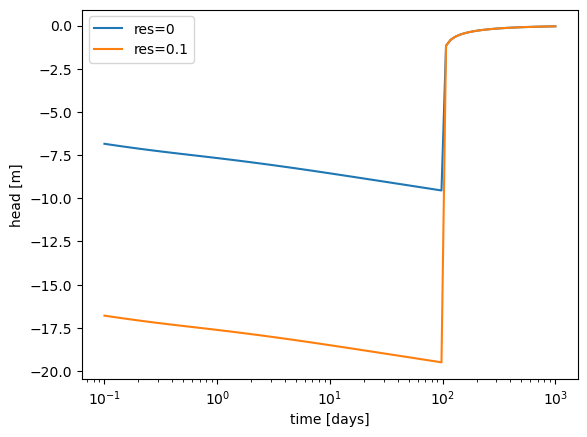

In [13]:
h = w.headinside(t)
plt.semilogx(t, h[0], label="res=0")  # head from previous solution
w.res = 0.1
ml.solve()
h = w.headinside(t)
plt.semilogx(t, h[0], label="res=0.1")
plt.legend(loc="best")
plt.ylabel("head [m]")
plt.xlabel("time [days]")

#### Exercise 1e
Conside again the case of a well without skin effect. 
Compute the head inside the well as a function of time from $t=1$ min till $t=1$ day using a logarithmic time axis. On the same graph, plot the head inside the well vs. time when the wellbore storage is taken into account.

self.neq  1
solution complete
self.neq  1
solution complete


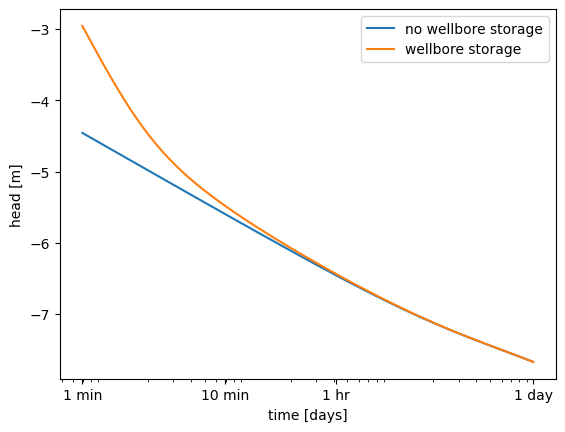

In [15]:
tmin = 1.0 / 24 / 60  # 1 minute
ml = ttim.ModelMaq(
    kaq=[1, 20, 2],
    z=[25, 20, 18, 10, 8, 0],
    c=[1000, 2000],
    Saq=[1e-4, 1e-4, 1e-4],
    Sll=[0, 0],
    phreatictop=False,
    tmin=1e-4,
    tmax=1,
)
w = ttim.Well(ml, xw=0, yw=0, rw=0.2, tsandQ=[(0, 1000)], layers=1)
ml.solve()
t = np.logspace(np.log10(tmin), 0, 100)
h = w.headinside(t)
plt.semilogx(t, h[0], label="no wellbore storage")  # head from previous solution
w.rc = 0.2
ml.solve()
h = w.headinside(t)
plt.semilogx(t, h[0], label="wellbore storage")
plt.legend(loc="best")
plt.ylabel("head [m]")
plt.xlabel("time [days]")
plt.xticks([tmin, 10 * tmin, 60 * tmin, 1], ["1 min", "10 min", "1 hr", "1 day"]);